sigma^2 = lambda * sigma(prev)^2 + (1-lambda)return^2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
import data_reader as dr

In [2]:
data, source = dr.read('kospi_extended.csv')

Loading data from file /home/changhyun/workspace/cxk858/dataset/kospi_extended.csv...



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 0 to 2461
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2456 non-null   object 
 1   Open                 2456 non-null   float64
 2   High                 2456 non-null   float64
 3   Low                  2456 non-null   float64
 4   Close                2456 non-null   float64
 5   Adj Close            2456 non-null   float64
 6   Volume               2456 non-null   float64
 7   Daily_trading_range  2456 non-null   float64
 8   Log_Volume_change    2455 non-null   float64
 9   Daily_return         2455 non-null   float64
 10  Daily_log_return     2455 non-null   float64
 11  Target               2434 non-null   float64
dtypes: float64(11), object(1)
memory usage: 249.4+ KB


In [4]:
data['Target']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2457    0.146351
2458    0.146712
2459    0.141543
2460    0.141185
2461    0.147144
Name: Target, Length: 2456, dtype: float64

In [5]:
trainingData = data[22:]

In [6]:
data = data.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_return'], axis=1)
trainingData = trainingData.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_return'], axis=1)

In [7]:
data['Squared_return'] = data['Daily_log_return']**2
data.info()
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 0 to 2461
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Daily_trading_range  2456 non-null   float64
 1   Log_Volume_change    2455 non-null   float64
 2   Daily_log_return     2455 non-null   float64
 3   Target               2434 non-null   float64
 4   Squared_return       2455 non-null   float64
dtypes: float64(5)
memory usage: 115.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2434 entries, 22 to 2461
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Daily_trading_range  2434 non-null   float64
 1   Log_Volume_change    2434 non-null   float64
 2   Daily_log_return     2434 non-null   float64
 3   Target               2434 non-null   float64
dtypes: float64(4)
memory usage: 95.1 KB


In [8]:
# daily_vol = []
# for i in range(22, len(data['Squared_return'])):
#     returns = data[['Squared_return']].iloc[i-22:i,0]
#     vol= np.sqrt(returns.mean()*252)
#     daily_vol.append(vol)
vol_init = np.sqrt(data[['Squared_return']].iloc[0:21,0].mean()*252)


In [9]:
# daily_vol = pd.DataFrame(daily_vol)
# daily_vol.columns = ['Daily_volatility']
# daily_vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Daily_volatility  2434 non-null   float64
dtypes: float64(1)
memory usage: 19.1 KB


In [10]:
ld=0.94
sq = data[['Squared_return']].iloc[22:,0]
sq = np.array(sq)
sq = sq.reshape(2434,1)
arr_daily_vol = np.array(daily_vol)

In [11]:
ewma_vol = (1-ld) * sq + ld*(arr_daily_vol**2)
ewma_vol = np.sqrt(ewma_vol)
ewma_vol = pd.DataFrame(ewma_vol)
ewma_vol.columns = ['Daily_volatility']
ewma_vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Daily_volatility  2434 non-null   float64
dtypes: float64(1)
memory usage: 19.1 KB


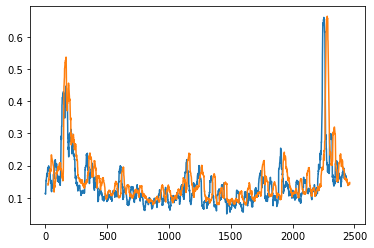

In [16]:
plt.plot(ewma_vol)
plt.plot(data['Target'])

In [13]:
ewma_vol.tail(10)

,Daily_volatility
2424,0.171026
2425,0.159566
2426,0.159495
2427,0.159289
2428,0.159506
2429,0.168038
2430,0.159121
2431,0.167375
2432,0.166143
2433,0.163951


In [14]:
target = data['Target'].dropna()
target.tail(10)

2452    0.139336
2453    0.141568
2454    0.140959
2455    0.143371
2456    0.145036
2457    0.146351
2458    0.146712
2459    0.141543
2460    0.141185
2461    0.147144
Name: Target, dtype: float64